In [60]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import textstat

In [6]:
df_modified = pd.read_csv('../Datasets/Modified_Books_rating.csv')

In [8]:
df_modified.head()

,review/helpfulness,Rating,Review,helpful_0,helpful_1,helpful_ratio,ratio_percent,review_len,IsHelpful
0,36/37,5.0,Ruth Allman has written an excellent book abou...,36,37,0.972973,97,153,1
1,29/30,5.0,"I have been using this book since 1988, the ei...",29,30,0.966667,96,63,1
2,25/28,5.0,"My poor dogeared, stained copy of this book ca...",25,28,0.892857,89,206,1
3,3/20,1.0,This book in my opinion is biased and takes an...,3,20,0.150000,15,92,0
4,20/20,5.0,If you're already a fan of the Eyewitness Trav...,20,20,1.000000,100,234,1


In [9]:
df_modified.drop(['review/helpfulness'], axis='columns', inplace=True)

df = df_modified.rename(columns={"helpful_0":"votes_helpful", "helpful_1":"votes_total", "ratio_percent":"helpful_percent"})

In [10]:
df_modified.head()

,Rating,Review,helpful_0,helpful_1,helpful_ratio,ratio_percent,review_len,IsHelpful
0,5.0,Ruth Allman has written an excellent book abou...,36,37,0.972973,97,153,1
1,5.0,"I have been using this book since 1988, the ei...",29,30,0.966667,96,63,1
2,5.0,"My poor dogeared, stained copy of this book ca...",25,28,0.892857,89,206,1
3,1.0,This book in my opinion is biased and takes an...,3,20,0.150000,15,92,0
4,5.0,If you're already a fan of the Eyewitness Trav...,20,20,1.000000,100,234,1


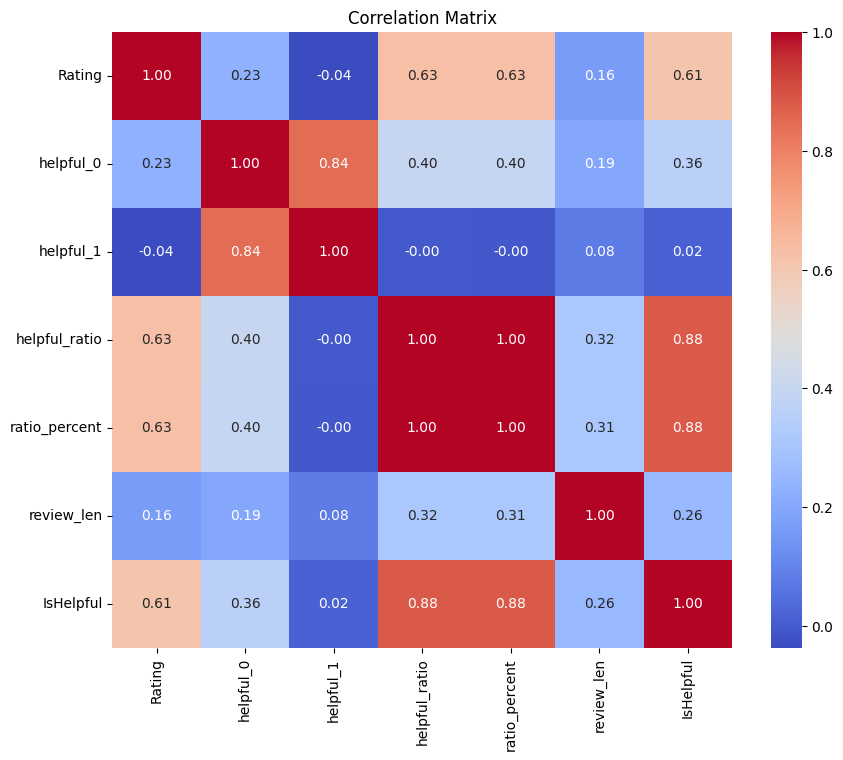

In [11]:
# Select only numeric columns
numeric_columns = df_modified.select_dtypes(include=['number']).columns
correlation_matrix = df_modified[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Originaler Datensatz

In [61]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm 
import textstat


tqdm.pandas()

In [12]:
df = pd.read_csv('../Datasets/Books_rating.csv')

In [15]:
df[['helpful_0', 'helpful_1']] = df['review/helpfulness'].str.split('/', expand=True)

# Konvertieren der 'helpfulness'-Spalte in numerische Werte (falls notwendig)
#df['review/helpfulness'] = pd.to_numeric(df['review/helpfulness'], errors='coerce')

df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,helpful_0,helpful_1
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,7,7
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,10,10
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",10,11
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",7,7
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,3,3


In [18]:
df['helpful_0'] = df['helpful_0'].progress_apply(pd.to_numeric)
df['helpful_1'] = df['helpful_1'].progress_apply(pd.to_numeric)

  0%|          | 0/3000000 [00:00<?, ?it/s]

  0%|          | 0/3000000 [00:00<?, ?it/s]

In [19]:
df['helpful_0'] = df['helpful_0'].astype(int)
df['helpful_1'] = df['helpful_1'].astype(int)

In [32]:
df.drop(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/time', 'review/summary'], axis='columns', inplace=True)


df = df.rename(columns={"helpful_0":"votes_helpful", "helpful_1":"votes_total", "ratio_percent":"helpful_percent"})
df = df.rename(columns={"review/text":"Review","review/score": "Rating"})
df.head()

KeyError: "['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/time', 'review/summary'] not found in axis"

In [30]:
# Check for missing values in the "Review" column
missing_values = df['Review'].isnull()

# Replace missing values with an empty string or any other appropriate value
df['Review'].fillna('', inplace=True)

# Apply the len function to calculate the length of each review
df['review_len'] = df['Review'].apply(len)

In [34]:
df = df.rename(columns={"helpful_0":"votes_helpful", "helpful_1":"votes_total", "ratio_percent":"helpful_percent"})
df.head()

,review/helpfulness,Rating,Review,votes_helpful,votes_total,review_len
0,7/7,4.0,This is only for Julie Strain fans. It's a col...,7,7,457
1,10/10,5.0,I don't care much for Dr. Seuss but after read...,10,10,1423
2,10/11,5.0,"If people become the books they read and if ""t...",10,11,1752
3,7/7,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",7,7,3662
4,3/3,4.0,Philip Nel - Dr. Seuss: American IconThis is b...,3,3,1542


### ARI

In [39]:
def calculate_ari(text):
    ari = textstat.automated_readability_index(text)
    return ari

In [40]:
df['ARI'] = df['Review'].apply(calculate_ari)

In [42]:
# Zähle die Anzahl der Reviews mit einem ARI-Wert von weniger als 8
low_ari_reviews = df[df['ARI'] < 8]
num_low_ari_reviews = len(low_ari_reviews)

print(f"Anzahl der Reviews mit ARI < 8: {num_low_ari_reviews}")

Anzahl der Reviews mit ARI < 8: 1292505


In [43]:
low_ari_reviews = df[df['ARI'] > 8]
num_low_ari_reviews = len(low_ari_reviews)

print(f"Anzahl der Reviews mit ARI > 8: {num_low_ari_reviews}")

Anzahl der Reviews mit ARI > 8: 1677080


In [45]:
def convert_ari(df):
    if df['ARI'] <= 8.0:
        ari = 1 # for readable
    else:
        ari = 0 # for not readable
    return ari

In [46]:
df['IsReadable'] = df.apply(convert_ari, axis=1)
df.head()

,review/helpfulness,Rating,Review,votes_helpful,votes_total,review_len,ARI,IsReadable
0,7/7,4.0,This is only for Julie Strain fans. It's a col...,7,7,457,8.0,1
1,10/10,5.0,I don't care much for Dr. Seuss but after read...,10,10,1423,13.1,0
2,10/11,5.0,"If people become the books they read and if ""t...",10,11,1752,10.4,0
3,7/7,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",7,7,3662,12.7,0
4,3/3,4.0,Philip Nel - Dr. Seuss: American IconThis is b...,3,3,1542,8.1,0


### helpfulness

In [47]:
def convert_label(df) : 
    if df['ratio_percent'] <= 70 : 
        rate = 0 # for Negative 
    else : 
        rate = 1 # for Positive
        
    return rate

In [54]:
num_rows = len(df[df['votes_total'] == 20])
print("Number of rows with helpful_1 > 3: ", num_rows)

Number of rows with helpful_1 > 3:  885732


In [52]:
df['helpful_ratio'] = df['votes_helpful'] / df['votes_total']

In [62]:
# Replace non-finite values with a default value (e.g., 0)
df['helpful_ratio'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# Convert the "helpful_ratio" column to a percentage and then to integer
df['ratio_percent'] = (df['helpful_ratio'] * 100).astype(int)

# Display the updated DataFrame
df.head()

,review/helpfulness,Rating,Review,votes_helpful,votes_total,review_len,ARI,IsReadable,helpful_ratio,ratio_percent
0,7/7,4.0,This is only for Julie Strain fans. It's a col...,7,7,457,8.0,1,1.000000,100
1,10/10,5.0,I don't care much for Dr. Seuss but after read...,10,10,1423,13.1,0,1.000000,100
2,10/11,5.0,"If people become the books they read and if ""t...",10,11,1752,10.4,0,0.909091,90
3,7/7,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",7,7,3662,12.7,0,1.000000,100
4,3/3,4.0,Philip Nel - Dr. Seuss: American IconThis is b...,3,3,1542,8.1,0,1.000000,100


In [63]:
def convert_label(df) : 
    if df['ratio_percent'] <= 70 : 
        rate = 0 # for Negative 
    else : 
        rate = 1 # for Positive
        
    return rate

In [64]:
df['IsHelpful'] = df.apply(convert_label, axis = 1)
df.head()

,review/helpfulness,Rating,Review,votes_helpful,votes_total,review_len,ARI,IsReadable,helpful_ratio,ratio_percent,IsHelpful
0,7/7,4.0,This is only for Julie Strain fans. It's a col...,7,7,457,8.0,1,1.000000,100,1
1,10/10,5.0,I don't care much for Dr. Seuss but after read...,10,10,1423,13.1,0,1.000000,100,1
2,10/11,5.0,"If people become the books they read and if ""t...",10,11,1752,10.4,0,0.909091,90,1
3,7/7,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",7,7,3662,12.7,0,1.000000,100,1
4,3/3,4.0,Philip Nel - Dr. Seuss: American IconThis is b...,3,3,1542,8.1,0,1.000000,100,1


### Adjectives

In [65]:
# Language
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag
from nltk.tokenize import word_tokenize

import re 
from collections import Counter
from string import punctuation

lemma = WordNetLemmatizer()

In [68]:
## achtung dauert so 10 Min
# calculate number of adjectives per review
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')

#def count_adjectives(text):
    #words = word_tokenize(text)
    #words = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords.words('english')]
    #pos_tags = pos_tag(words)
    #adjectives = [word for word, tag in pos_tags if tag.startswith('JJ')]
    #return len(adjectives)

#df['Adjective_Count'] = df['Review'].progress_apply(count_adjectives)
#df['Adjective_Ratio'] = df['Adjective_Count'] / df['review_len']

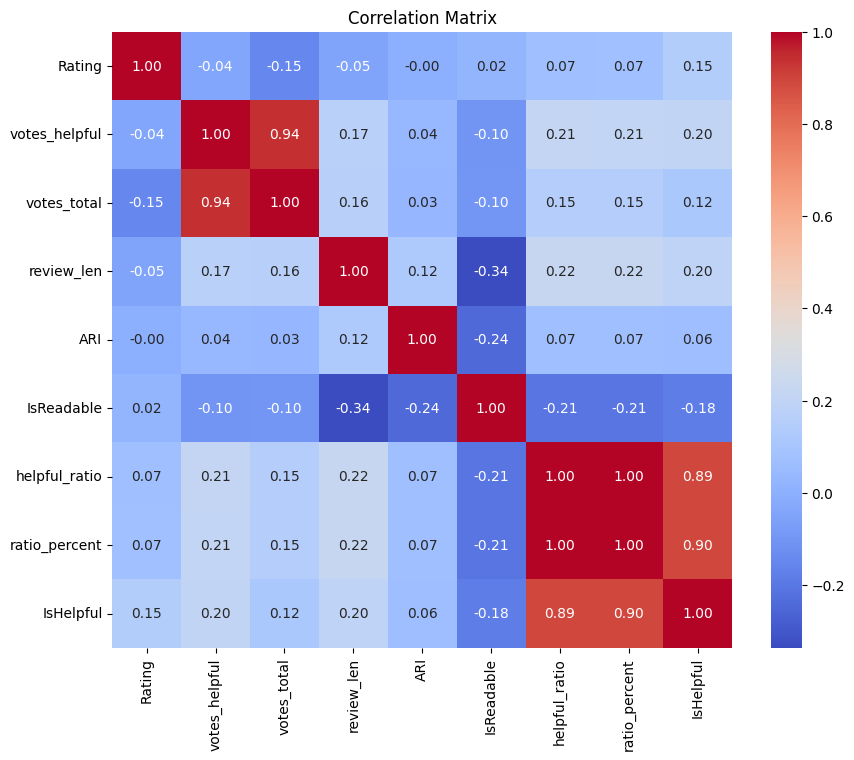

In [69]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [71]:
df.drop(["votes_helpful", "votes_total", "helpful_ratio", "ratio_percent"], axis="columns", inplace=True)

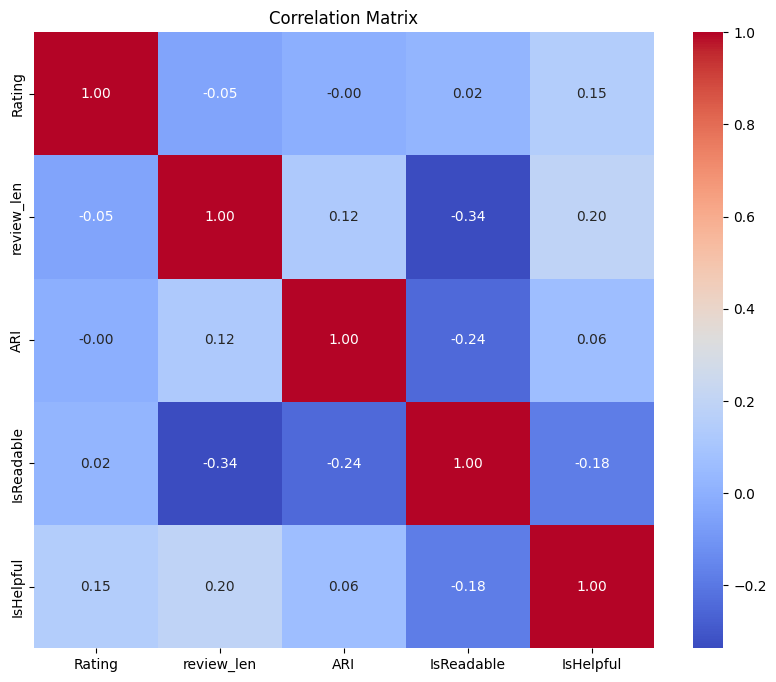

In [72]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [74]:
df.head(50)

,review/helpfulness,Rating,Review,review_len,ARI,IsReadable,IsHelpful
0,7/7,4.0,This is only for Julie Strain fans. It's a col...,457,8.0,1,1
1,10/10,5.0,I don't care much for Dr. Seuss but after read...,1423,13.1,0,1
2,10/11,5.0,"If people become the books they read and if ""t...",1752,10.4,0,1
3,7/7,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",3662,12.7,0,1
4,3/3,4.0,Philip Nel - Dr. Seuss: American IconThis is b...,1542,8.1,0,1
5,2/2,4.0,"""Dr. Seuss: American Icon"" by Philip Nel is a ...",1975,15.7,0,1
6,3/4,5.0,Theodor Seuss Giesel was best known as 'Dr. Se...,533,9.4,0,1
7,0/0,5.0,When I recieved this book as a gift for Christ...,1219,8.7,0,0
8,0/0,5.0,Trams (or any public transport) are not usuall...,362,8.9,0,0
9,3/5,4.0,"As far as I am aware, this is the first book-l...",1399,10.4,0,0
